# 中央競馬

In [1]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [27]:
%autoreload

In [28]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [29]:
pd.options.display.max_columns = 300

In [30]:
df

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,weather,ground_state,race_class,place,season,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_

In [31]:
df = df[df['race_type'] != 2]

In [32]:
df.drop(['weather', 'ground_state'], errors='ignore', axis=1, inplace=True)

C:\Users\SV8\AppData\Local\Temp\ipykernel_12336\3717257257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['weather', 'ground_state'], errors='ignore', axis=1, inplace=True)


In [33]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,season,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_last_year,jockey_dirt

In [34]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [35]:
df_t = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_22_to_23.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str})
df_t

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,weather,ground_state,race_class,place,season,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_

In [36]:
df_t = df_t[df_t['race_type'] != 2]

In [37]:
df_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)

C:\Users\SV8\AppData\Local\Temp\ipykernel_12336\2692494328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)


## RFmodel

In [17]:
%autoreload

In [ ]:
rf = predict.RFModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = rf.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

TypeError: RFModel.__init__() got an unexpected keyword argument 'stochastic_variation'

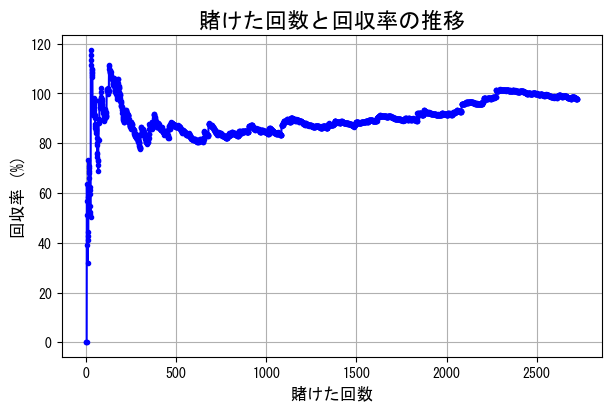

総払い戻し金額: 630820.0円
賭けた回数: 2724回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [ ]:
rf.plot_returns_rate(df_t)

In [28]:
rf_returns = rf.calc_results(df_t)
rf_returns

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [18]:
rf_returns[rf_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
10,202330051109,1210.0,200,5400,1210.0,0.224074,-4190.0
12,202330051708,3230.0,600,6600,4440.0,0.672727,-2160.0
14,202330053010,2140.0,200,7400,6580.0,0.889189,-820.0
167,202330110807,12150.0,600,94400,18730.0,0.198411,-75670.0
279,202342032412,590.0,200,156800,19320.0,0.123214,-137480.0
285,202342052905,1820.0,200,159600,21140.0,0.132456,-138460.0
336,202343011804,9140.0,600,189400,30280.0,0.159873,-159120.0
476,202347072005,1960.0,600,269400,32240.0,0.119673,-237160.0
565,202348032908,1410.0,200,318800,33650.0,0.105552,-285150.0
612,202348071207,20720.0,600,345000,54370.0,0.157594,-290630.0


In [19]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010606)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target


## NNmodel

In [65]:
%autoreload

In [66]:
nn = predict.NNModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = nn.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())

Confusion Matrix:
 [[8960 2346]
 [1347 1794]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83     11306
           1       0.43      0.57      0.49      3141

    accuracy                           0.74     14447
   macro avg       0.65      0.68      0.66     14447
weighted avg       0.77      0.74      0.76     14447

Accuracy: 0.7443759950162664
predicted_target
0    41804
1    17768
Name: count, dtype: int64


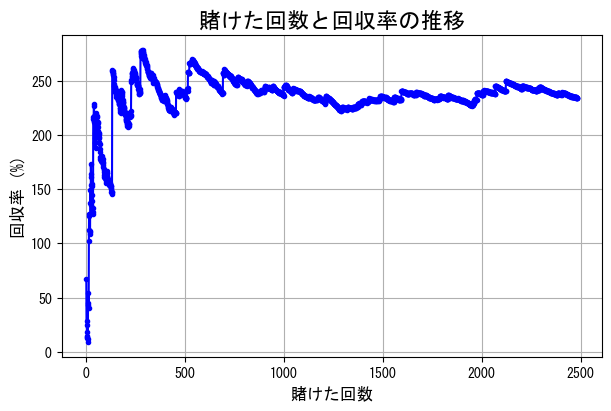

総払い戻し金額: 1679110.0円
賭けた回数: 2482回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,300,300,200.0,0.666667,-100.0
1,202201010102,0.0,400,700,200.0,0.285714,-500.0
2,202201010103,0.0,100,800,200.0,0.250000,-600.0
3,202201010106,0.0,300,1100,200.0,0.181818,-900.0
4,202201010108,0.0,300,1400,200.0,0.142857,-1200.0
...,...,...,...,...,...,...,...
2477,202310030709,0.0,100,715800,1676510.0,2.342149,960710.0
2478,202310030710,0.0,100,715900,1676510.0,2.341821,960610.0
2479,202310030712,0.0,600,716500,1676510.0,2.339860,960010.0
2480,202310030802,2600.0,600,717100,1679110.0,2.341528,962010.0


In [67]:
nn.plot_returns_rate(df_t)

## LGBmodel

In [94]:
%autoreload

In [95]:
lgb = predict.LGBModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.60, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = lgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 12844, number of negative: 12844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30563
[LightGBM] [Info] Number of data points in the train set: 25688, number of used features: 221
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 12844, number of negative: 12844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4564
[LightGBM] [Info] Number of data points in the train set: 25688, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[9221 2085]
 [1235 1906]]
Classification Report:
               precision    recall  f1-score   supp

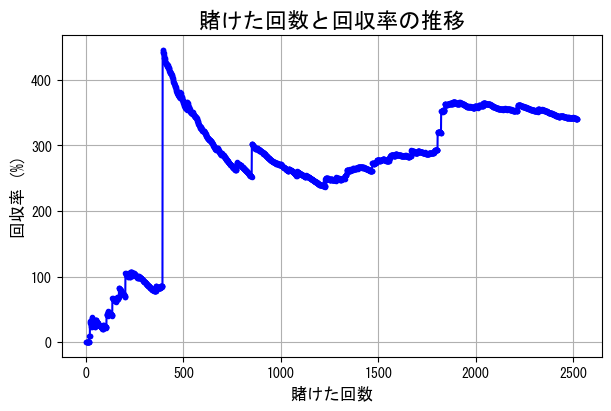

総払い戻し金額: 2441420.0円
賭けた回数: 2521回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,600,600,0.0,0.000000,-600.0
1,202201010106,0.0,300,900,0.0,0.000000,-900.0
2,202201010109,0.0,100,1000,0.0,0.000000,-1000.0
3,202201010110,0.0,400,1400,0.0,0.000000,-1400.0
4,202201010202,0.0,300,1700,0.0,0.000000,-1700.0
...,...,...,...,...,...,...,...
2516,202310030712,0.0,400,717900,2441420.0,3.400780,1723520.0
2517,202310030803,0.0,100,718000,2441420.0,3.400306,1723420.0
2518,202310030804,0.0,600,718600,2441420.0,3.397467,1722820.0
2519,202310030807,0.0,400,719000,2441420.0,3.395577,1722420.0


In [96]:
lgb.plot_returns_rate(df_t)

## XGBmodel

In [48]:
%autoreload

In [49]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = xgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[5008 1235]
 [ 900 1014]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      6243
           1       0.45      0.53      0.49      1914

    accuracy                           0.74      8157
   macro avg       0.65      0.67      0.66      8157
weighted avg       0.75      0.74      0.75      8157

Accuracy: 0.738261615790119
Selected Feature Importance:
                                            feature  importance
70             rank_mean_in_mode_course_len_past_5    0.039180
73        rank_diff_mean_in_mode_course_len_past_5    0.038382
100                jockey_stakes_participation_sum    0.018938
108                  jockey_flat_participation_sum    0.018309
15                                        rank_min    0.017024
76            prize_mean_in_mode_course_len_past_5    0.016031
93                             jockey_n_top_2_mean    0.015701
71              rank_min_in_mode_course_l

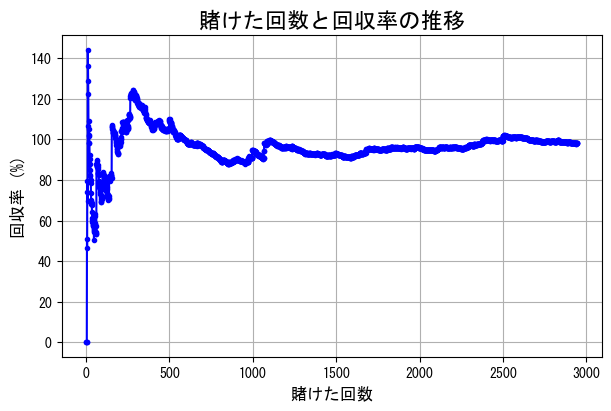

総払い戻し金額: 704780.0円
賭けた回数: 2945回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041901,0.0,100,100,0.0,0.000000,-100.0
1,202330041903,0.0,100,200,0.0,0.000000,-200.0
2,202330041904,0.0,600,800,0.0,0.000000,-800.0
3,202330041905,0.0,100,900,0.0,0.000000,-900.0
4,202330041907,510.0,100,1000,510.0,0.510000,-490.0
...,...,...,...,...,...,...,...
2940,202350123107,2690.0,1000,718000,704780.0,0.981588,-13220.0
2941,202350123108,0.0,100,718100,704780.0,0.981451,-13320.0
2942,202350123109,0.0,300,718400,704780.0,0.981041,-13620.0
2943,202350123110,0.0,600,719000,704780.0,0.980223,-14220.0


In [50]:
xgb.plot_returns_rate(df_t)

## Ensamblemodel

In [78]:
%autoreload

In [79]:
en = predict.EnsembleModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.65, 
  max_bet=600, pivot_horse=True, select_features=True, 
  select_num=60, final_model='xgb',save=True,
)
pred_df = en.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[6217  973]
 [1096  960]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      7190
           1       0.50      0.47      0.48      2056

    accuracy                           0.78      9246
   macro avg       0.67      0.67      0.67      9246
weighted avg       0.77      0.78      0.77      9246

Accuracy: 0.7762275578628596
Selected Feature Importance:
                                       feature  importance
0         rank_mean_in_mode_course_len_past_2    0.042689
2        prize_mean_in_mode_course_len_past_2    0.037485
3         rank_mean_in_mode_course_len_past_5    0.030970
1         prize_sum_in_mode_course_len_past_2    0.028200
5          rank_min_in_mode_course_len_past_2    0.026734
4        prize_mean_in_mode_course_len_past_5    0.026534
14                           rank_mean_past_5    0.022881
8                            prize_sum_past_2    0.020350
11   

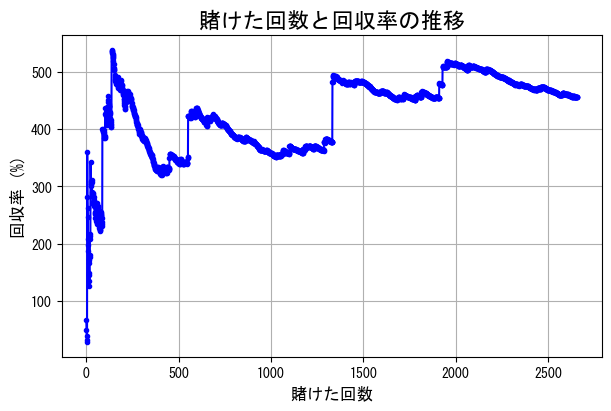

総払い戻し金額: 3320050.0円
賭けた回数: 2657回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,300,300,200.0,0.666667,-100.0
1,202201010102,0.0,100,400,200.0,0.500000,-200.0
2,202201010103,0.0,100,500,200.0,0.400000,-300.0
3,202201010104,0.0,100,600,200.0,0.333333,-400.0
4,202201010106,0.0,100,700,200.0,0.285714,-500.0
...,...,...,...,...,...,...,...
2652,202310030704,0.0,100,727600,3317450.0,4.559442,2589850.0
2653,202310030712,0.0,400,728000,3317450.0,4.556937,2589450.0
2654,202310030802,2600.0,600,728600,3320050.0,4.556753,2591450.0
2655,202310030803,0.0,100,728700,3320050.0,4.556127,2591350.0


In [80]:
en.plot_returns_rate(df_t, per_race=False)

In [20]:
# 0.90, lgb: select_num = 30 | 0 - 1000: 3.0 - 3.5 , 1000 - 2000: 3.0 - 4.0 
# 0.85, xgb: select_num = 60 | 0 - 1000: 3.5 - 4.0 , 1000 - 2000: 3.5 - 4.3 
# 0.85, xgb: select_num = 80 | 0 - 1000: 3.5 - 5.3 , 1000 - 2000: 3.5 - 4.5
# 0.85, xgb: select_num = 60 | 0 - 1000: 3.0 - 4.5 , 1000 - 2000: 3.5 - 5.0
# 0.85, xgb: select_num = 60 | 0 - 1000: 4.0 - 5.0 , 1000 - 2000: 4.0 - 5.2

In [21]:
en_returns = en.calc_results(df_t, per_race=False)

In [22]:
pred_df[(pred_df['race_id'] == 202201010103) & (pred_df['rank'] <= 3)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
15,202201010103,2.0,0.212453,0
18,202201010103,3.0,0.049562,0
26,202201010103,1.0,0.909837,1


In [23]:
671  / 2768

0.24241329479768786

In [48]:
en_returns.head(40)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,600,600,200.0,0.333333,-400.0
1,202201010102,0.0,100,700,200.0,0.285714,-500.0
2,202201010103,0.0,100,800,200.0,0.250000,-600.0
3,202201010104,0.0,600,1400,200.0,0.142857,-1200.0
4,202201010106,0.0,300,1700,200.0,0.117647,-1500.0
5,202201010109,0.0,400,2100,200.0,0.095238,-1900.0
6,202201010110,1700.0,400,2500,1900.0,0.760000,-600.0
7,202201010201,1070.0,300,2800,2970.0,1.060714,170.0
8,202201010202,0.0,100,2900,2970.0,1.024138,70.0
9,202201010204,0.0,100,3000,2970.0,0.990000,-30.0


In [29]:
en_returns[en_returns['returns'] > 5000].head(20)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
26,202201010602,8110.0,600,10000,18730.0,1.873000,8730.0
80,202202010201,7430.0,300,25200,44650.0,1.771825,19450.0
98,202202010501,17000.0,300,29600,66470.0,2.245608,36870.0
104,202202010509,8100.0,300,31500,77050.0,2.446032,45550.0
106,202202010601,13340.0,600,32200,90390.0,2.807143,58190.0
108,202202010603,9500.0,400,33200,99890.0,3.008735,66690.0
111,202202010608,6300.0,600,34400,108440.0,3.152326,74040.0
118,202202010709,10240.0,600,37100,118680.0,3.198922,81580.0
123,202202010804,11420.0,600,38500,131010.0,3.402857,92510.0
144,202203010209,48570.0,600,45000,184930.0,4.109556,139930.0


In [41]:
pred_df[pred_df['race_id'] == 202204040108][['race_id', 'rank', 'number', 'predicted_proba', 'predicted_target']]

,race_id,rank,number,predicted_proba,predicted_target
10764,202204040108,8.0,1,0.191538,0
10765,202204040108,3.0,2,0.771419,1
10766,202204040108,7.0,3,0.733643,1
10767,202204040108,12.0,4,0.179926,0
10768,202204040108,10.0,5,0.526302,0
10769,202204040108,13.0,6,0.419242,0
10770,202204040108,9.0,7,0.420046,0
10771,202204040108,6.0,8,0.391568,0
10772,202204040108,4.0,9,0.685466,1
10773,202204040108,2.0,10,0.735546,1


In [147]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010101)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
3,202201010101,5.0,0.698386,1
4,202201010101,3.0,0.818284,1


In [145]:
pred_df[pred_df['predicted_proba'] >= 0.85][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
21,202201010103,7.0,0.941704,1
26,202201010103,1.0,0.904281,1
40,202201010104,10.0,0.904884,1
...,...,...,...,...
47113,202310030802,2.0,0.955980,1
47116,202310030802,1.0,0.912627,1
47119,202310030802,3.0,0.876364,1
47147,202310030804,2.0,0.863812,1


In [244]:
pred_df[(pred_df['predicted_proba'] >= 0.85) & (pred_df['rank'] == 1)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
66,202201010106,1.0,0.949900,1
601,202201010503,1.0,0.940648,1
654,202201010507,1.0,0.873339,1
892,202201020101,1.0,0.891271,1
1121,202201020207,1.0,0.859515,1
...,...,...,...,...
46534,202310030408,1.0,0.881263,1
46693,202310030507,1.0,0.899776,1
46789,202310030602,1.0,0.922170,1
46992,202310030704,1.0,0.909107,1


In [242]:
887/2420

0.3665289256198347

# 地方競馬

## Ensenblemodel

In [68]:
%autoreload

In [2]:
df_cs = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2022.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})
df_cs_t = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2023.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [3]:
df_cs

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202230041301,2019102377,05371,a0372,7.0,1,1,1,3,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202230041301,2019100933,05389,05688,3.0,2,2,1,3,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202230041301,2019103603,05512,00886,8.0,3,3,1,3,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202230041301,2019101131,05492,a0374,6.0,4,4,0,3,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202230041301,2019105899,05578,05630,1.0,5,5,0,3,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,160.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69518,202250123112,2017100370,05328,a0220,6.0,6,8,0,5,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69519,202250123112,2016104184,05616,05321,9.0,7,9,0,6,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69520,202250123112,2019100721,05522,05757,5.0,7,10,1,3,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69521,202250123112,2019106957,a024c,05752,12.0,8,11,1,3,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_cs_t

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202330041901,2019104927,05608,05749,4.0,1,1,1,4,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202330041901,2019104990,05595,05688,3.0,2,2,0,4,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202330041901,2020107100,05592,a03d6,2.0,3,3,1,3,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202330041901,2019104047,05389,05630,8.0,4,4,1,4,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202330041901,2015103440,05054,05460,5.0,5,5,0,8,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70196,202350123112,2018106103,05580,05639,5.0,6,8,0,5,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70197,202350123112,2019103794,05576,a029e,10.0,7,9,1,4,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70198,202350123112,2015101771,05364,05466,8.0,7,10,0,8,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70199,202350123112,2017100636,05646,05623,7.0,8,11,0,6,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
returns_cs = pd.read_csv(os.path.join(local_paths.COMPLETED_CS_DIR, 'returns.csv'), index_col=0 ,sep="\t")

In [6]:
df_cs.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)
df_cs_t.drop(['weather', 'ground_state'], axis=1, errors='ignore', inplace=True)

In [7]:
pd.options.display.max_columns = 300

In [8]:
df_cs

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,place,season,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,win_rate_autumn,win_rate_spring,win_rate_summer,win_rate_winter,place_rate_autumn,place_rate_spring,place_rate_summer,place_rate_winter,show_rate_autumn,show_rate_spring,show_rate_summer,show_rate_winter,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_last_year,jockey_dirt_participat

In [10]:
en = predict.EnsembleModel(
  train_df=df_cs, returns_df=returns_cs, bet_type='umaren', threshold=0.65, 
  max_bet=300, pivot_horse=True, select_features=True, 
  select_num=60, final_model='xgb', cs=True, save=False
)
pred_df = en.predict_target(df_cs_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[3098  499]
 [ 626  439]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      3597
           1       0.47      0.41      0.44      1065

    accuracy                           0.76      4662
   macro avg       0.65      0.64      0.64      4662
weighted avg       0.75      0.76      0.75      4662

Accuracy: 0.7586872586872587
Selected Feature Importance:
                                       feature  importance
1         rank_mean_in_mode_course_len_past_2    0.040156
0    rank_diff_mean_in_mode_course_len_past_2    0.037353
2        prize_mean_in_mode_course_len_past_2    0.030211
4         rank_mean_in_mode_course_len_past_5    0.025197
7        prize_mean_in_mode_course_len_past_5    0.019932
5                       rank_diff_mean_past_2    0.019689
9                               n_horses_mean    0.019431
3    rank_diff_mean_in_mode_course_len_past_5    0.018809
13   

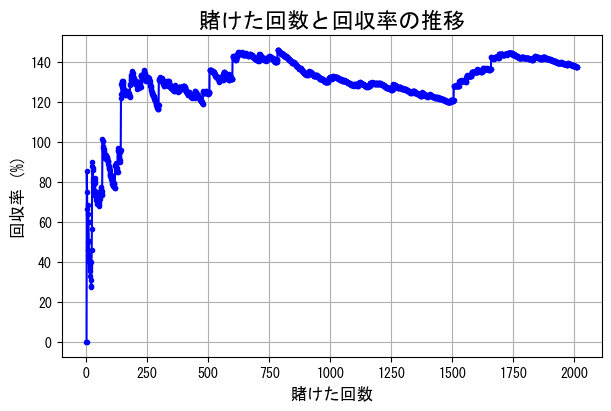

総払い戻し金額: 415750.0円
賭けた回数: 2011回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330042007,0.0,300,300,0.0,0.000000,-300.0
1,202330042607,0.0,300,600,0.0,0.000000,-600.0
2,202330042708,600.0,100,700,600.0,0.857143,-100.0
3,202330042709,0.0,100,800,600.0,0.750000,-200.0
4,202330050301,0.0,100,900,600.0,0.666667,-300.0
...,...,...,...,...,...,...,...
2006,202350123102,0.0,300,302200,415750.0,1.375745,113550.0
2007,202350123103,0.0,100,302300,415750.0,1.375289,113450.0
2008,202350123107,0.0,100,302400,415750.0,1.374835,113350.0
2009,202350123110,0.0,100,302500,415750.0,1.374380,113250.0


In [11]:
en.plot_returns_rate(df_cs_t, per_race=False)

In [12]:
# xgb: bet_type = umaren, select_num = 50, max_bet = 600, threshold = 0.6 | returns_rate = 1.45
# xgb: bet_type = umaren, select_num = 60, max_bet = 200, threshold = 0.65 | returns_rate = 1.75
# xgb: bet_type = umaren, select_num = 50, max_bet = 300, threshold = 0.60 | returns_rate = 1.4

In [13]:
len(df_cs_t['race_id'].unique())

7132

In [14]:
en_returns = en.calc_results(df_cs_t, per_race=False)

In [15]:
en_returns['bet_sum'].value_counts()

bet_sum
100    1387
300     393
200     231
Name: count, dtype: int64

In [16]:
pred_df[pred_df['race_id'] == 202348041110][['number', 'predicted_target']]

,number,predicted_target
44854,2,0
44856,4,0
44857,5,0
44858,6,0
44859,7,1
44860,8,1
44861,9,0
44862,10,1


In [21]:
en_returns.iloc[150:200, :]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
150,202330081707,0.0,100,25500,33190.0,1.301569,7690.0
151,202330081708,0.0,100,25600,33190.0,1.296484,7590.0
152,202330081709,0.0,300,25900,33190.0,1.281467,7290.0
153,202330081711,0.0,300,26200,33190.0,1.266794,6990.0
154,202330082202,0.0,100,26300,33190.0,1.261977,6890.0
155,202330082301,0.0,100,26400,33190.0,1.257197,6790.0
156,202330082308,0.0,200,26600,33190.0,1.247744,6590.0
157,202330082309,0.0,100,26700,33190.0,1.243071,6490.0
158,202330082310,0.0,100,26800,33190.0,1.238433,6390.0
159,202330082408,0.0,100,26900,33190.0,1.233829,6290.0


In [58]:
en_returns[en_returns['returns'] > 2000].head(50)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
102,202330080103,2580.0,200,11300,11440.0,1.012389,140.0
133,202330082211,2290.0,100,14900,19630.0,1.317450,4730.0
202,202330100410,2210.0,200,22500,32150.0,1.428889,9650.0
507,202342053101,11260.0,100,58900,79120.0,1.343294,20220.0
625,202343020706,10520.0,100,72800,103900.0,1.427198,31100.0
756,202343121808,2280.0,200,87700,119010.0,1.357013,31310.0
802,202347040504,3330.0,200,93400,127630.0,1.366488,34230.0
909,202347110810,2780.0,100,105900,140960.0,1.331067,35060.0
1031,202348041110,41000.0,100,120300,194370.0,1.615711,74070.0
1038,202348041309,4620.0,200,121300,201140.0,1.658203,79840.0


# 出馬表からの予想結果

In [1]:
import pandas as pd
from datetime import datetime, timedelta

date = (datetime.now() + timedelta(days=1)).strftime('%Y%m%d')

pred_path = 'pred_df-candidates/pred_candidates'

In [2]:
# ファイルのパスを指定して読み込む
pred_candidates_full = pd.read_csv(f'{pred_path}_full_{date}.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates = pd.read_csv(f'{pred_path}_{date}.csv', sep="\t", encoding='utf-8', index_col=0)

In [3]:
pred_candidates_full

,race_id,horse_id,number,place,predicted_proba,predicted_target,bet_sum,total_bet
0,202406050301,2022103443,2,中山,0.688341,1,300.0,300.0
1,202406050301,2022104758,5,中山,0.900603,1,300.0,300.0
2,202406050301,2022104876,6,中山,0.680795,1,300.0,300.0
3,202406050301,2022103562,14,中山,0.705703,1,300.0,300.0
4,202406050302,2022105456,3,中山,0.754148,1,600.0,900.0
...,...,...,...,...,...,...,...,...
94,202408070311,2021105119,1,京都,0.840005,1,100.0,5200.0
95,202408070311,2021104825,7,京都,0.759698,1,100.0,5200.0
96,202408070311,2020102853,12,京都,0.792285,1,100.0,5200.0
97,202408070312,2019103816,3,京都,0.675788,1,0.0,5200.0


In [3]:
pred_candidates_full_cs = pd.read_csv(f'{pred_path}_full_{date}_cs.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates_cs = pd.read_csv(f'{pred_path}_{date}_cs.csv', sep="\t", encoding='utf-8', index_col=0)

In [4]:
pred_candidates_cs

,race_id,horse_id,number,place,predicted_proba,predicted_target,bet_sum,total_bet
2,202448120606,2021104457,7,名古屋,0.657567,1,100.0,100.0
3,202448120606,2020101878,10,名古屋,0.707315,1,100.0,100.0
4,202448120607,2021106973,2,名古屋,0.789632,1,100.0,200.0
5,202448120607,2021105310,12,名古屋,0.656707,1,100.0,200.0
12,202448120612,2019102474,7,名古屋,0.763848,1,100.0,300.0
13,202448120612,2018101817,11,名古屋,0.796037,1,100.0,300.0


In [4]:
df = pred_candidates.copy()

In [6]:
df_cs = pred_candidates_cs.copy()

In [5]:
# race_idごとにnumberの値をハイフンで結合し、combinationsカラムを作成
df['combinations'] = df.groupby('race_id')['number'].transform(lambda x: '-'.join(map(str, sorted(x.unique()))))

In [8]:
df_cs['combinations'] = df_cs.groupby('race_id')['number'].transform(lambda x: '-'.join(map(str, sorted(x.unique()))))

In [6]:
# race_idごとに条件を満たす最大のnumberをpivot_horseに設定
def get_pivot_horse(group):
    filtered = group[group['predicted_proba'] >= 0.85]
    if not filtered.empty:
        max_row = filtered.loc[filtered['predicted_proba'].idxmax()]
        return max_row['number']
    else:
        return 'None'



# race_idごとにpivot_horseのpredicted_probaをpivot_probaとして取得
def get_pivot_proba(group):
    pivot_number = group['pivot_horse'].iloc[0]
    if pd.notna(pivot_number):
        # pivot_horseに対応するpredicted_probaを取得（行が存在するか確認）
        pivot_proba_row = group.loc[group['number'] == pivot_number, 'predicted_proba']
        if not pivot_proba_row.empty:
            return pivot_proba_row.iloc[0]
    return 'None'

In [7]:
# race_idごとにpivot_horseを計算
pivot_horses = df.groupby('race_id').apply(get_pivot_horse)
df['pivot_horse'] = df['race_id'].map(pivot_horses)
# pivot_probaカラムをrace_idごとに追加
pivot_probas = df.groupby('race_id').apply(get_pivot_proba)
df['pivot_proba'] = df['race_id'].map(pivot_probas)

C:\Users\SV8\AppData\Local\Temp\ipykernel_17428\2872854508.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_horses = df.groupby('race_id').apply(get_pivot_horse)
C:\Users\SV8\AppData\Local\Temp\ipykernel_17428\2872854508.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_probas = df.groupby('race_id').apply(get_pivot_proba)


In [11]:
pivot_horses = df_cs.groupby('race_id').apply(get_pivot_horse)
df_cs['pivot_horse'] = df_cs['race_id'].map(pivot_horses)
pivot_probas = df_cs.groupby('race_id').apply(get_pivot_proba)
df_cs['pivot_proba'] = df_cs['race_id'].map(pivot_probas)

C:\Users\SV8\AppData\Local\Temp\ipykernel_8800\1966606976.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_horses = df_cs.groupby('race_id').apply(get_pivot_horse)
C:\Users\SV8\AppData\Local\Temp\ipykernel_8800\1966606976.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_probas = df_cs.groupby('race_id').apply(get_pivot_proba)


In [8]:
df.drop(['horse_id', 'number', 'predicted_proba', 'predicted_target'], axis=1).drop_duplicates()

,race_id,place,bet_sum,total_bet,combinations,pivot_horse,pivot_proba
0,202406050301,中山,300.0,300.0,2-5-6-14,5,0.900603
4,202406050302,中山,600.0,900.0,3-7-8-11-12,7,0.921154
11,202406050304,中山,600.0,1500.0,3-7-8-10-12,3,0.879444
16,202406050307,中山,100.0,1600.0,1-2-10,None,None
19,202406050308,中山,300.0,1900.0,1-10-12-14,14,0.875688
23,202406050309,中山,400.0,2300.0,4-5-11-13,None,None
27,202406050311,中山,100.0,2400.0,1-7-8,None,None
30,202406050312,中山,100.0,2500.0,2-8-12,None,None
33,202407040301,中京,100.0,2600.0,3-5-9,3,0.881246
36,202407040302,中京,100.0,2700.0,8-10-11,None,None


In [13]:
df_cs.drop(['horse_id', 'number', 'predicted_proba', 'predicted_target'], axis=1).drop_duplicates()

,race_id,place,bet_sum,total_bet,combinations,pivot_horse,pivot_proba
2,202448120606,名古屋,100.0,100.0,7-10,None,None
4,202448120607,名古屋,100.0,200.0,2-12,None,None
12,202448120612,名古屋,100.0,300.0,7-11,None,None


In [ ]:
# トータル収支 (11/9更新モデル) : center 11/15 ~
# -2100 + 1480 + 210 : -410
# -410 - 2000 + 720 : -1690
# -1690 - 2200 + 2500 : -1390
# トータル収支 (11/22更新モデル) : center 11/23 ~
# -1390 - 2900 + 1370 + 370 : -2920
# -2920 - 3100 : -6020
# トータル収支 (11/29更新モデル)
# -6020 - 2900 : -8920
# -8920 - 3800 + 4390 : -8330
-8330

In [10]:
# トータル収支 (11/26モデル更新) : countryside 11/28 ~
# -1200 + 290 + 910 + 420 : 420
# トータル収支 (11/29モデル更新)
# 420 - 1300 : -880
# -880 -2000 + 300 : -2580
# -2580 - 1800 + 110 + 1180 : -3090
# -3090 - 300 : -3390